# Sequential vs Functional

# The Keras sequential models allow for NNs to be build quickly.  However, sequential networks stack layers one after another, providing for a very linear model development.

On the other hand, Keras functional API allows for layers to be build and used multiple times and in a variety of orders.  This allows for much more intricate NNs to be built while still allowing for simple linear networks as the sequential model does.  This flexibility in the Keras functional API allows us to create some interesting networks.

For instance, we'll take a look at the SciKit-Learn Breast Cancer dataset and from the 30 features measured, determine if a tumor is malignant or benign.  An interesting feature of the dataset though is that the 30 features, are really 10 features, with different measurments associated with them.

The features are:
Radius (mean, std err, worst)
Texture (mean, std err, worst)
Perimeter (mean, std err, worst)
Area (mean, std err, worst)
Smoothness (mean, std err, worst)
Compactness (mean, std err, worst)
Concavity (mean, std err, worst)
Concave Points (mean, std err, worst)
Symmetry (mean, std err, worst)
Fractal Dimension (mean, std err, worst)

Given 10 parameters, each given 3 ways, we will construct 10 small NNs, and then combine them to make a final prediction.  

Warning, I don't know if this will provide 'good' accuracy scores... but this is more of a learning exercise than anything else.

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model

In [2]:
#load in the breast cancer dataset into X (features) and y (target) as a Pandas DataFrame
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=570)

In [3]:
# a listing of the features I'll need to grab
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [4]:
#Generic small scale NN that we'll combine later
radius_input = Input(shape=(3,), name='Radius')
radius_hidden_layer1 = Dense(units=24, activation='relu')(radius_input)
radius_hidden_layer2 = Dense(units=12, activation='relu')(radius_hidden_layer1)
radius_output = Dense(units=12, activation='relu')(radius_hidden_layer2)

#Generic small scale NN that we'll combine later
texture_input = Input(shape=(3,), name='Texture')
texture_hidden_layer1 = Dense(units=24, activation='relu')(texture_input)
texture_hidden_layer2 = Dense(units=12, activation='relu')(texture_hidden_layer1)
texture_output = Dense(units=12, activation='relu')(texture_hidden_layer2)

#Generic small scale NN that we'll combine later
perimeter_input = Input(shape=(3,), name='perimeter')
perimeter_hidden_layer1 = Dense(units=24, activation='relu')(perimeter_input)
perimeter_hidden_layer2 = Dense(units=12, activation='relu')(perimeter_hidden_layer1)
perimeter_output = Dense(units=12, activation='relu')(perimeter_hidden_layer2)

#Generic small scale NN that we'll combine later
area_input = Input(shape=(3,), name='area')
area_hidden_layer1 = Dense(units=24, activation='relu')(area_input)
area_hidden_layer2 = Dense(units=12, activation='relu')(area_hidden_layer1)
area_output = Dense(units=12, activation='relu')(area_hidden_layer2)

#Generic small scale NN that we'll combine later
smoothness_input = Input(shape=(3,), name='smoothness')
smoothness_hidden_layer1 = Dense(units=24, activation='relu')(smoothness_input)
smoothness_hidden_layer2 = Dense(units=12, activation='relu')(smoothness_hidden_layer1)
smoothness_output = Dense(units=12, activation='relu')(smoothness_hidden_layer2)

#Generic small scale NN that we'll combine later
compactness_input = Input(shape=(3,), name='compactness')
compactness_hidden_layer1 = Dense(units=24, activation='relu')(compactness_input)
compactness_hidden_layer2 = Dense(units=12, activation='relu')(compactness_hidden_layer1)
compactness_output = Dense(units=12, activation='relu')(compactness_hidden_layer2)

#Generic small scale NN that we'll combine later
concavity_input = Input(shape=(3,), name='concavity')
concavity_hidden_layer1 = Dense(units=24, activation='relu')(concavity_input)
concavity_hidden_layer2 = Dense(units=12, activation='relu')(concavity_hidden_layer1)
concavity_output = Dense(units=12, activation='relu')(concavity_hidden_layer2)

#Generic small scale NN that we'll combine later
concave_input = Input(shape=(3,), name='concave')
concave_hidden_layer1 = Dense(units=24, activation='relu')(concave_input)
concave_hidden_layer2 = Dense(units=12, activation='relu')(concave_hidden_layer1)
concave_output = Dense(units=12, activation='relu')(concave_hidden_layer2)

#Generic small scale NN that we'll combine later
symmetry_input = Input(shape=(3,), name='symmetry')
symmetry_hidden_layer1 = Dense(units=24, activation='relu')(symmetry_input)
symmetry_hidden_layer2 = Dense(units=12, activation='relu')(symmetry_hidden_layer1)
symmetry_output = Dense(units=12, activation='relu')(symmetry_hidden_layer2)

#Generic small scale NN that we'll combine later
fractal_input = Input(shape=(3,), name='fractal')
fractal_hidden_layer1 = Dense(units=24, activation='relu')(fractal_input)
fractal_hidden_layer2 = Dense(units=12, activation='relu')(fractal_hidden_layer1)
fractal_output = Dense(units=12, activation='relu')(fractal_hidden_layer2)



In [5]:
#combine the smale scale NNs together
from keras.layers import concatenate
combined_1 = concatenate([radius_output, texture_output, perimeter_output,
                         area_output, smoothness_output, compactness_output,
                         concavity_output, concave_output, symmetry_output, 
                          fractal_output])


#pass the combined NNs through a relu, then a softmax to get a probability
combined_2 = Dense(units=16, activation='relu', name='CombinedNNs')(combined_1)
output = Dense(units=1, activation='softmax', name='CancerCategorization')(combined_2)



In [6]:
#define the model
model = Model(inputs=[radius_input, texture_input, perimeter_input, area_input, smoothness_input,
                     compactness_input, concavity_input, concave_input, symmetry_input, fractal_input],
                   outputs=[output], name='BreastCancer')

Model: "BreastCancer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Radius (InputLayer)            [(None, 3)]          0           []                               
                                                                                                  
 Texture (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 perimeter (InputLayer)         [(None, 3)]          0           []                               
                                                                                                  
 area (InputLayer)              [(None, 3)]          0           []                               
                                                                                       

 concatenate (Concatenate)      (None, 120)          0           ['dense_2[0][0]',                
                                                                  'dense_5[0][0]',                
                                                                  'dense_8[0][0]',                
                                                                  'dense_11[0][0]',               
                                                                  'dense_14[0][0]',               
                                                                  'dense_17[0][0]',               
                                                                  'dense_20[0][0]',               
                                                                  'dense_23[0][0]',               
                                                                  'dense_26[0][0]',               
                                                                  'dense_29[0][0]']               
          

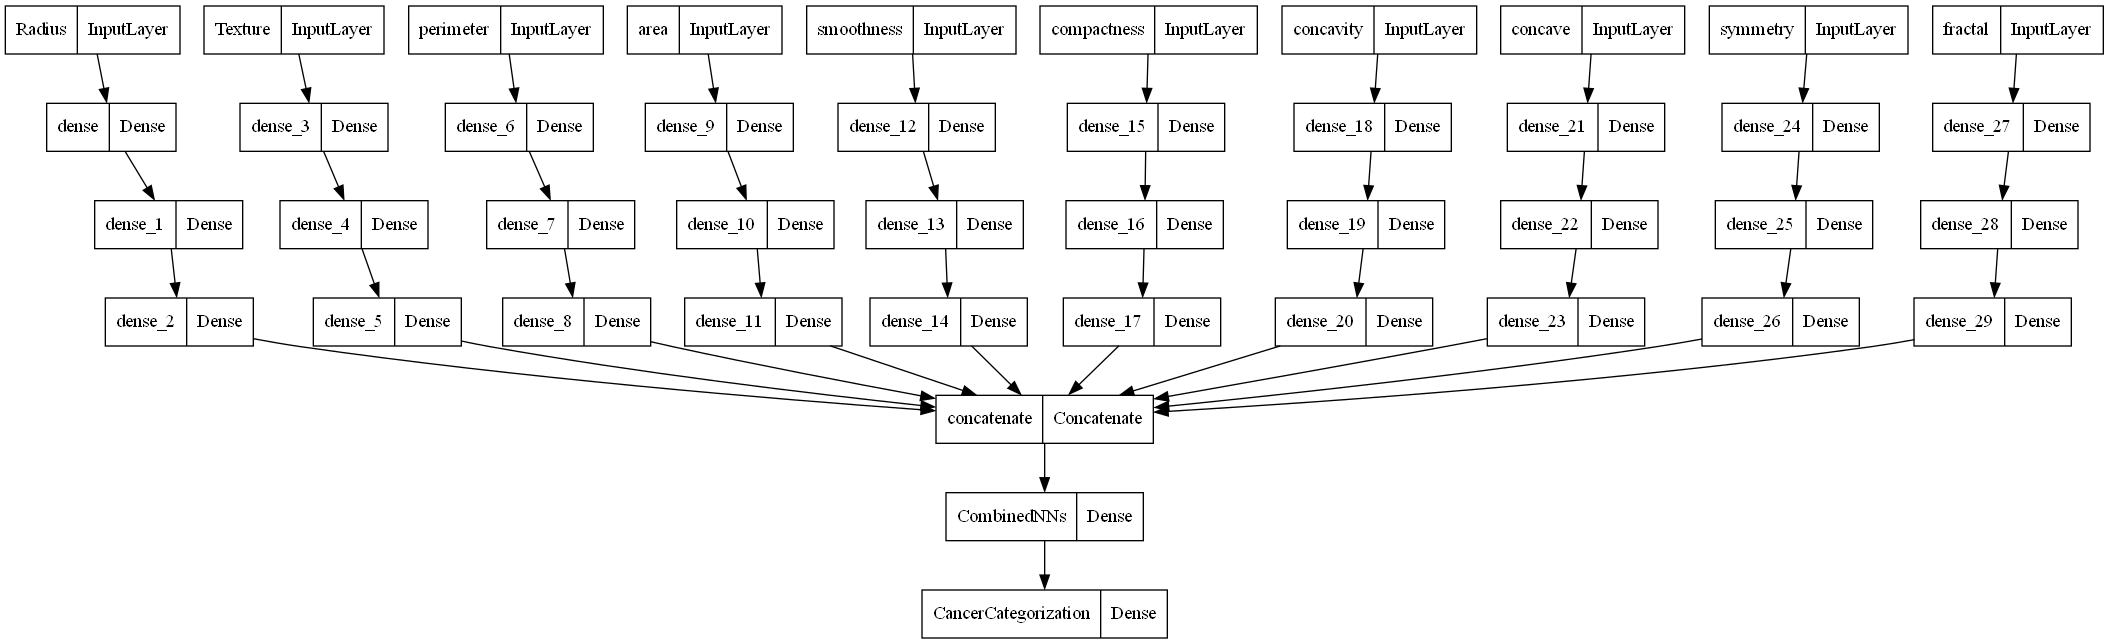

In [7]:
#output the model summary and the graph
print(model.summary())

plot_model(model, to_file='Model_test.png')

As you can see, the model build itself is very wide while also having depth.  You could modify this so that instead of going by each feature (radius, area, etc.) you go by (mean, std err, worst) and then combine them.

In [8]:
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [9]:
# clunky helper to quickly split up the features for the train/test split

def passthewords(feature:str):

    m = 'mean ' + feature
    e = feature + ' error'
    w = 'worst ' + feature
    
    return [m,e,w]


def splitfeature(Xtrain, Xtest, ytrain, ytest, feature:str):
    
    #Catch the poorly worded feature names
    if feature == 'concave':
        featurelist = ['mean concave points', 'concave points error', 'worst concave points']
    elif feature == 'fractal':
        featurelist = ['mean fractal dimension', 'fractal dimension error', 'worst fractal dimension']       
    else:
        featurelist = passthewords(feature)
        
    X_train = Xtrain[featurelist]
    X_test = Xtest[featurelist]
    y_train = ytrain
    y_test = ytest
    
    return X_train, X_test, y_train, y_test

In [10]:
# to make use of the model we'll have to slice up the features of X_train/test and y_train/test so they
# can be passed correctly

X_train_radius, X_test_radius, y_train_radius, y_test_radius = splitfeature(X_train, X_test, y_train, y_test, 'radius')
X_train_texture, X_test_texture, y_train_texture, y_test_texture = splitfeature(X_train, X_test, y_train, y_test, 'texture')
X_train_perimeter, X_test_perimeter, y_train_perimeter, y_test_perimeter = splitfeature(X_train, X_test, y_train, y_test, 'perimeter')
X_train_area, X_test_area, y_train_area, y_test_area = splitfeature(X_train, X_test, y_train, y_test, 'area')
X_train_smoothness, X_test_smoothness, y_train_smoothness, y_test_smoothness = splitfeature(X_train, X_test, y_train, y_test, 'smoothness')
X_train_compactness, X_test_compactness, y_train_compactness, y_test_compactness = splitfeature(X_train, X_test, y_train, y_test, 'compactness')
X_train_concavity, X_test_concavity, y_train_concavity, y_test_concavity = splitfeature(X_train, X_test, y_train, y_test, 'concavity')
X_train_concave, X_test_concave , y_train_concave , y_test_concave  = splitfeature(X_train, X_test, y_train, y_test, 'concave')
X_train_symmetry, X_test_symmetry, y_train_symmetry, y_test_symmetry = splitfeature(X_train, X_test, y_train, y_test, 'symmetry')
X_train_fractal, X_test_fractal , y_train_fractal , y_test_fractal  = splitfeature(X_train, X_test, y_train, y_test, 'fractal')




In [11]:
# set optimizer
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss={'CancerCategorization': tf.keras.losses.BinaryCrossentropy(from_logits=False)},
              metrics={'CancerCategorization': tf.keras.metrics.BinaryAccuracy()})

x_train_data = {'Radius':X_train_radius, 'Texture':X_train_texture, 'perimeter':X_train_perimeter, 
           'area':X_train_area, 'smoothness':X_train_smoothness, 
         'compactness':X_train_compactness, 'concavity':X_train_concavity, 
           'concave':X_train_concave, 'symmetry':X_train_symmetry, 'fractal':X_train_fractal}


y_train_data = {'CancerCategorization':y_train}




In [12]:
#Fit the model
model.fit(x_train_data,y_train_data, epochs=50, verbose=0)

In [13]:
#Evaluate
X_test_data = {'Radius':X_test_radius, 'Texture':X_test_texture, 'perimeter':X_test_perimeter, 
           'area':X_test_area, 'smoothness':X_test_smoothness, 
         'compactness':X_test_compactness, 'concavity':X_test_concavity, 
           'concave':X_test_concave, 'symmetry':X_test_symmetry, 'fractal':X_test_fractal}



y_test_data = {'CancerCategorization':y_test}

_, accuracy = model.evaluate(X_test_data, y_test_data)

print(f'Accuracy: {accuracy:.3f}')

6/6 [==============================] - 0s 7ms/step - loss: 0.0708 - binary_accuracy: 0.6199
Accuracy: 0.620


And there is the model... Is it a good model... no, not even close.  It is massivly overfitting.  Categorizing everything as benign would give an accuracy of 0.6274 and that is essentially what is going on here.

But is this a model?  Yes.  And did I learn something from it?  You bet.

A few takeaways from my efforts:

    Using a BinaryCrossEntropy loss required me to have my final output to be "output = Dense(units=1...)"
    rather than "output = Dense(units=2...).  The latter would be useful for a SparceCategoricalCrossentropy.
    
    Have many small NNs that became a single one drastically overfit the data.
    
    Keeping track of all of the inputs for X_train, X_test, y_train, y_test was a general pain.  Furthermore... make 
    sure your labels are consitant.  The change of labeling format broke my helper function for a solid hour...
    
    I could have probably created a function to help with the build of the small NNs.  Live and learn
    

